<a href="https://colab.research.google.com/github/nasyw4/nolimit-ds-test-nasywa-raihanah/blob/main/EDA_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library

In [ ]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Prepare Dataset

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Dataset Review Produk/Shopee_Sampled_Reviews.csv")
df1

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,61ccddf5-2848-47d6-83a7-434e4e613bfa,Andi Gunawan,https://play-lh.googleusercontent.com/a-/ACB-R...,Udah sering belanja trs tapi setiap pengajuan ...,1,1,2.95.47,2022-12-05 13:29:47,"Hi kak, maaf ya buat gak nyaman. terkait kenda...",2022-11-04 16:59:58
1,affdfdc0-0a10-4353-8ba9-52a669f8a1ba,Sari Sari,https://play-lh.googleusercontent.com/a/AGNmyx...,Semenjak di upgrade.. SHOPEE JADI LEMOT,1,0,NaN,2022-12-27 05:36:57,Hi kak maaf atas ketidaknyamannya🙏 Pastiin RAM...,2022-12-27 06:14:13
2,f5a73edb-ae1a-4a1b-93a6-aa2a5fe5217e,Laz Ai,https://play-lh.googleusercontent.com/a/AGNmyx...,Penyelesaian masalah sangat buruk,1,0,NaN,2022-08-15 07:00:00,NaN,NaN
3,0ffb52f7-3611-4fd3-a874-6e3ef6ad4fed,Kuprit Bae,https://play-lh.googleusercontent.com/a/AGNmyx...,Apk engga😇 jls,1,0,2.52.07,2023-03-16 04:05:30,"Hai kak, maaf ya bikin ga nyaman. Kedepannya S...",2023-03-16 05:17:45
4,c726e46a-3343-4db0-8733-30e8b42d9f1c,Evans irdas,https://play-lh.googleusercontent.com/a-/ACB-R...,Lelet stress. Udah update terbaru tetap aja lemot,1,0,2.95.52,2022-12-22 17:34:33,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2495,4d21b653-5dd0-47ce-b20a-51c8e3c390d8,Amhy Chipz,https://play-lh.googleusercontent.com/a/AGNmyx...,Ok ok,5,0,2.91.30,2022-08-22 11:31:28,"Yuhuuuu thanks ya kak buat ulasannya, mimin ma...",2022-08-22 13:06:29
2496,52870974-06c3-4568-8cf4-bf92958bcd1b,Iwan Syah,https://play-lh.googleusercontent.com/a-/ACB-R...,☝️👌👍🙏,5,0,2.94.25,2022-11-02 15:04:46,NaN,NaN
2497,4a5f549b-43e7-4614-9480-5e82e9aea492,Herlan Zulfansyah,https://play-lh.googleusercontent.com/a/AGNmyx...,🌟🌟🌟🌟🌟🌟🌟,5,0,2.95.20,2022-11-16 03:02:03,"Mantul ya kak Shopee, alias mantap betul. hehe...",2022-11-16 05:01:14
2498,f3ccda1e-312f-4bd3-94d6-8f46f3877bbc,Mu Rino,https://play-lh.googleusercontent.com/a-/ACB-R...,Sayang pay laternya agak berbelit..,5,0,2.95.47,2022-12-02 13:33:53,NaN,NaN


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Dataset Review Produk/tokopedia-product-reviews-2019.csv")
df2

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,1,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...
1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
2,3,Paket rapi...mantap....cepat....sampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
3,4,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...
4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...
...,...,...,...,...,...,...,...,...,...
40602,40889,gak bisa ditutup.. ukuran gak pas..,1,olahraga,MINERAL WATER POT WATER PURIFIER 28 liter BIO ...,144442054,2,648559,https://www.tokopedia.com/pusatdermawand/miner...
40603,40890,Penjual krg peduli dan brg jelek. Brg yg dikir...,1,olahraga,PANCI PRESTO IDEALIFE 7 LITER - IL 707 &#40; I...,313781913,1,648559,https://www.tokopedia.com/pusatdermawand/panci...
40604,40891,"pelayanan kurang sigap, berhari2 dr nanya baik...",1,olahraga,EXCIDER BIKE 2 - sepeda fitnes magnetic lipat ...,71873370,1,648559,https://www.tokopedia.com/pusatdermawand/excid...
40605,40892,"barang yg dikirim tsk sesuai wrn, kl memang dr...",1,olahraga,TOTAL FITNES ALAT FITNESS SIT UP BENCH TOTAL &...,201690705,2,648559,https://www.tokopedia.com/pusatdermawand/total...


In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/Dataset Review Produk/raw_review_googleplay.csv")
df3

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f1205de2-9298-470e-8da8-5eb43e302c02,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bakalan langganan belanja disini,5,0,NaN,2024-09-18 10:52:28,"Hi Toppers, terima kasih untuk rating dan ulas...",2024-09-18 11:20:01,NaN
1,0588c5ca-887c-4594-92e5-a39e72721396,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya dengar ada promo pengguna baru diskon sam...,3,0,3.280.0,2024-09-18 10:48:29,"Makasih ratingnya, Toppers. Ke depannya kami a...",2024-09-18 11:20:02,3.280.0
2,ce309431-c05d-4e53-8b27-8b159ae5a3fa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,3.280.0,2024-09-18 10:41:53,"Hi Toppers, terima kasih untuk rating dan ulas...",2024-09-18 11:00:05,3.280.0
3,1bcb43b6-09b1-481e-89d1-b04bdf69f400,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,banyak diskon,5,0,NaN,2024-09-18 10:41:08,Terima kasih sudah mempercayakan Tokopedia seb...,2024-09-18 11:00:10,NaN
4,2414fbdb-509d-4b79-8d73-3c4cc3de7eb3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kurang Transparan TAGIHAN TOKOPEDIA CARD, apa ...",2,0,NaN,2024-09-18 10:41:01,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-09-18 11:00:11,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1192495,91af69d4-5363-4cf7-b320-39c314bb6282,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantull,5,0,3.41,2019-08-24 14:04:54,"Hai Toppers, terima kasih kamu sudah memberika...",2019-08-25 06:25:51,3.41
1192496,04e78110-6905-46de-a32e-4217cb90b197,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Oke,5,0,3.26.1,2019-08-24 14:04:54,"Hai Siti, terima kasih sudah menggunakan aplik...",2019-08-25 06:25:38,3.26.1
1192497,88ca7045-aef9-4754-b75b-540aee14a3db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Josss,5,0,NaN,2019-08-24 14:04:46,"Hai Aditya, terima kasih kamu sudah memberikan...",2019-08-25 06:26:37,NaN
1192498,32093d5f-08ca-4a55-842a-91332f3c8d57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap bisa bayar ditempat,5,0,3.33,2019-08-24 14:04:21,"Hai Dedi, terima kasih sudah menggunakan aplik...",2019-08-25 06:28:37,3.33


In [ ]:
# Standarisasi nama kolom
df1 = df1.rename(columns={"content": "review_text", "score": "rating"})
df2 = df2.rename(columns={"text": "review_text"})
df3 = df3.rename(columns={"content": "review_text", "score": "rating"})

In [ ]:
# Drop kolom tidak perlu
df1 = df1[["review_text", "rating"]]
df2 = df2[["review_text", "rating"]]
df3 = df3[["review_text", "rating"]]

In [ ]:
# Gabungkan df
df = pd.concat([df1, df2, df3], ignore_index=True)

# Drop duplicate & missing value
df = df.drop_duplicates(subset=["review_text"])
df = df.dropna(subset=["review_text", "rating"])

In [ ]:
print(df.head())
print(df.shape)

                                         review_text  rating
0  Udah sering belanja trs tapi setiap pengajuan ...       1
1            Semenjak di upgrade.. SHOPEE JADI LEMOT       1
2                  Penyelesaian masalah sangat buruk       1
3                                     Apk engga😇 jls       1
4  Lelet stress. Udah update terbaru tetap aja lemot       1
(722968, 2)


In [ ]:
# Mapping rating
def map_sentiment(r):
    if r <= 2:
        return "negative"
    elif r == 3:
        return "neutral"
    else:
        return "positive"

df["sentiment"] = df["rating"].apply(map_sentiment)

In [ ]:
df

,review_text,rating,sentiment
0,Udah sering belanja trs tapi setiap pengajuan ...,1,negative
1,Semenjak di upgrade.. SHOPEE JADI LEMOT,1,negative
2,Penyelesaian masalah sangat buruk,1,negative
3,Apk engga😇 jls,1,negative
4,Lelet stress. Udah update terbaru tetap aja lemot,1,negative
...,...,...,...
1235593,Proses transaksi dan pengirimannya cepat,5,positive
1235594,online terpercaya,5,positive
1235596,"Brg""nya murah banget",5,positive
1235601,Lamaaaa,2,negative


In [ ]:
df.to_csv("/content/drive/MyDrive/Dataset Review Produk/final_reviews.csv", index=False)

## EDA & Preprocessing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset Review Produk/final_reviews.csv")
df.head()

,review_text,rating,sentiment
0,Udah sering belanja trs tapi setiap pengajuan ...,1,negative
1,Semenjak di upgrade.. SHOPEE JADI LEMOT,1,negative
2,Penyelesaian masalah sangat buruk,1,negative
3,Apk engga😇 jls,1,negative
4,Lelet stress. Udah update terbaru tetap aja lemot,1,negative


In [ ]:
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722968 entries, 0 to 722967
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_text  722968 non-null  object
 1   rating       722968 non-null  int64 
 2   sentiment    722968 non-null  object
dtypes: int64(1), object(2)
memory usage: 16.5+ MB
None
review_text    0
rating         0
sentiment      0
dtype: int64
                                         review_text  rating sentiment
0  Udah sering belanja trs tapi setiap pengajuan ...       1  negative
1            Semenjak di upgrade.. SHOPEE JADI LEMOT       1  negative
2                  Penyelesaian masalah sangat buruk       1  negative
3                                     Apk engga😇 jls       1  negative
4  Lelet stress. Udah update terbaru tetap aja lemot       1  negative


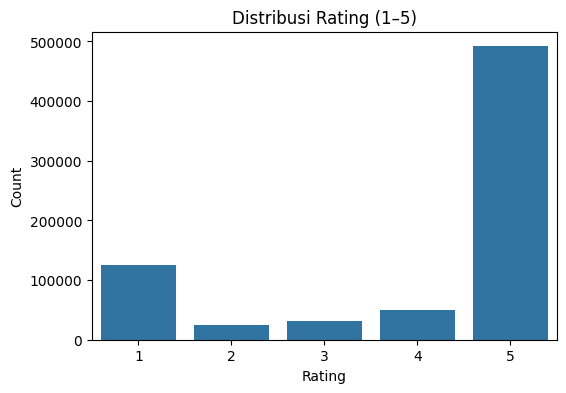

In [ ]:
# Distribusi Rating
plt.figure(figsize=(6,4))
sns.countplot(x=df["rating"])
plt.title("Distribusi Rating (1–5)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

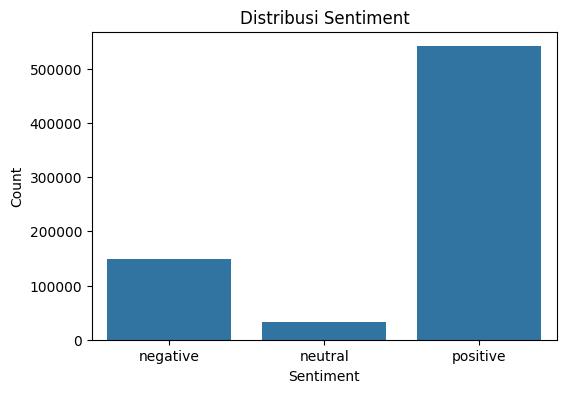

In [ ]:
# Distribusi Sentiment
plt.figure(figsize=(6,4))
sns.countplot(x=df["sentiment"],
              order=["negative","neutral","positive"])
plt.title("Distribusi Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

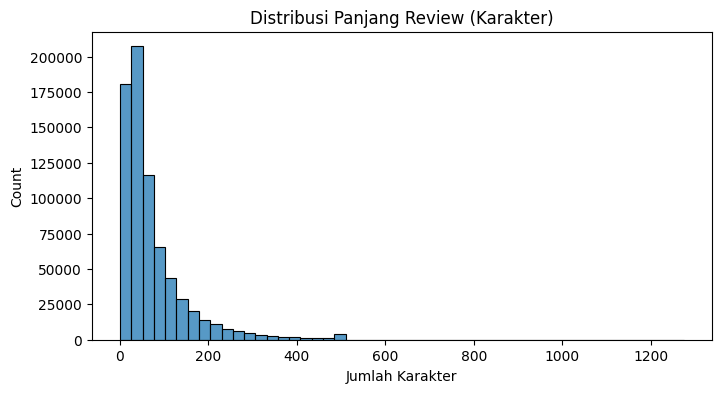

In [ ]:
df["char_len"] = df["review_text"].apply(len) # Jumlah karakter
df["word_len"] = df["review_text"].apply(lambda x: len(x.split())) # Jumlah kata

plt.figure(figsize=(8,4))
sns.histplot(df["char_len"], bins=50)
plt.title("Distribusi Panjang Review (Karakter)")
plt.xlabel("Jumlah Karakter")
plt.show()

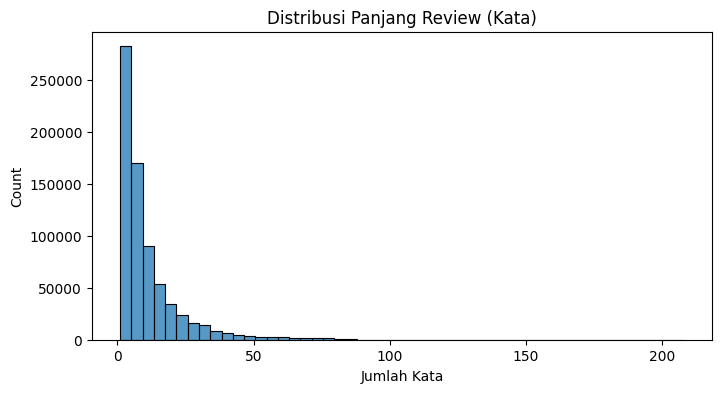

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df["word_len"], bins=50)
plt.title("Distribusi Panjang Review (Kata)")
plt.xlabel("Jumlah Kata")
plt.show()

In [ ]:
print("Statistik panjang karakter:")
print(df["char_len"].describe())

print("\nStatistik panjang kata:")
print(df["word_len"].describe())

Statistik panjang karakter:
count    722968.000000
mean         73.954059
std          78.026627
min           1.000000
25%          27.000000
50%          47.000000
75%          91.000000
max        1274.000000
Name: char_len, dtype: float64

Statistik panjang kata:
count    722968.000000
mean         11.156618
std          12.057749
min           1.000000
25%           4.000000
50%           7.000000
75%          13.000000
max         208.000000
Name: word_len, dtype: float64


In [ ]:
df['sentiment'].value_counts(normalize=True)

,proportion
sentiment,
positive,0.748719
negative,0.207305
neutral,0.043976


In [ ]:
import string

def clean_text(text):
    text = str(text)

    # hapus URL
    text = re.sub(r"http\S+|www.\S+", "", text)

    # hapus emoji
    text = text.encode('ascii', 'ignore').decode()

    # hapus tanda baca berlebih
    text = text.translate(str.maketrans("", "", string.punctuation))

    # hapus angka jika tidak penting
    text = re.sub(r"\d+", "", text)

    # hapus multiple spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text.lower()

In [ ]:
df["clean_text"] = df["review_text"].apply(clean_text)
df.head()

,review_text,rating,sentiment,char_len,word_len,clean_text
0,Udah sering belanja trs tapi setiap pengajuan ...,1,negative,96,15,udah sering belanja trs tapi setiap pengajuan ...
1,Semenjak di upgrade.. SHOPEE JADI LEMOT,1,negative,39,6,semenjak di upgrade shopee jadi lemot
2,Penyelesaian masalah sangat buruk,1,negative,33,4,penyelesaian masalah sangat buruk
3,Apk engga😇 jls,1,negative,14,3,apk engga jls
4,Lelet stress. Udah update terbaru tetap aja lemot,1,negative,49,8,lelet stress udah update terbaru tetap aja lemot


In [ ]:
df = df[df["clean_text"].str.split().str.len() >= 2]

In [ ]:
df[["review_text","clean_text"]].head(10)

,review_text,clean_text
0,Udah sering belanja trs tapi setiap pengajuan ...,udah sering belanja trs tapi setiap pengajuan ...
1,Semenjak di upgrade.. SHOPEE JADI LEMOT,semenjak di upgrade shopee jadi lemot
2,Penyelesaian masalah sangat buruk,penyelesaian masalah sangat buruk
3,Apk engga😇 jls,apk engga jls
4,Lelet stress. Udah update terbaru tetap aja lemot,lelet stress udah update terbaru tetap aja lemot
5,Fitur lengkap tapi apk berat,fitur lengkap tapi apk berat
6,Shopee express jasa pengiriman lelet sekali.ny...,shopee express jasa pengiriman lelet sekalinye...
7,"Bintang satu aja,,,, karena paylater ku d mati...",bintang satu aja karena paylater ku d matikan ...
8,Ga Kya dlu ada akun ff nya,ga kya dlu ada akun ff nya
9,Aplikasi lemot,aplikasi lemot


In [ ]:
df.to_csv("/content/drive/MyDrive/Dataset Review Produk/clean_reviews.csv", index=False)